<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Importance
อ้างอิง : https://youtu.be/Uojkhn-EXac?si=6n7IHb0XQWt9Rj7g

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [3]:
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,Recent_Date,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Recent_Creatinine,Recent_eGFR
0,0,2299,3386255,-7.158596,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,91.0,5.400,215.0,81.0,123.0,99.0,57.671,1,0.73,79.14
1,1,2299,4546471,5.550691,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,86.0,5.567,219.0,64.0,146.0,73.0,146.106,1,0.73,79.14
2,2,2299,5812902,-6.063710,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,100.0,5.300,193.0,62.0,129.0,65.0,50.831,1,0.73,79.14
3,3,2299,6947220,-12.812245,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,89.0,5.292,205.0,69.0,139.0,76.0,121.937,1,0.73,79.14
4,4,2299,8186767,28.287500,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,88.0,5.500,198.0,74.0,129.0,60.0,41.564,1,0.73,79.14


In [4]:
df.shape #ข้อมูลมีทั้งหมด 52620 แถว  84 คอลัมน์

(52620, 84)

In [5]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Hear

In [6]:
#เพิ่ม slope,L1-eGFR เพื่อใช้เป็นตัวเเปร y ในการทำนายหา feature impotant
selected_columns = ['Slopes', 'L1-eGFR','InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL', 'VisitLocation',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df = df[selected_columns]
df.head()

,Slopes,L1-eGFR,InPatient,OutPatient,Emergency,Sex,Age,NATNL,VisitLocation,G1M2-ARB,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,-7.158596,71.70,0,1,0,1,73,0,เวชปฏิบัติทั่วไป (OPD)-D03,90,...,41.678,4.9104,195.63,91.0,5.400,215.0,81.0,123.0,99.0,57.671
1,5.550691,63.60,0,1,0,1,74,0,เวชปฏิบัติทั่วไป (OPD)-D03,90,...,41.409,5.6073,267.72,86.0,5.567,219.0,64.0,146.0,73.0,146.106
2,-6.063710,70.20,0,1,0,1,75,0,เวชปฏิบัติทั่วไป (OPD)-D03,100,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,50.831
3,-12.812245,64.02,0,1,0,1,76,0,เวชปฏิบัติทั่วไป (OPD)-D03,35,...,41.351,5.2678,199.66,89.0,5.292,205.0,69.0,139.0,76.0,121.937
4,28.287500,48.54,0,1,0,1,78,0,เวชปฏิบัติทั่วไป (OPD)-D03,100,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,41.564


#Feature Impotant

หา Feature Impotant ก่อนนำไปทำ PCA

In [7]:
df.shape #จาก 84 คอลัมน์เลือกมา 72 คอลัมน์ ที่ใช้โดยไม่รวม  slope, L1-eGFR

(52620, 74)

##slope

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['Slopes']
model.fit(X,y)

RandomForestRegressor(n_estimators=250, random_state=7)

In [9]:
model.feature_importances_

array([3.59629757e-03, 2.69215271e-03, 1.42153789e-03, 2.47239504e-02,
       5.13336426e-02, 4.98408041e-04, 3.16021455e-03, 6.42362158e-03,
       2.09976710e-03, 9.06519649e-03, 3.88286387e-03, 3.75734569e-03,
       2.01692879e-03, 3.46954328e-03, 3.95618410e-03, 1.50878605e-03,
       2.98024041e-03, 1.83778476e-03, 5.77480297e-04, 1.63519216e-03,
       4.94381167e-03, 2.76457356e-03, 3.22377812e-03, 1.23266446e-03,
       1.60361322e-04, 8.51366765e-04, 1.66626995e-03, 4.35117697e-05,
       0.00000000e+00, 2.26629769e-04, 2.94580048e-02, 2.53377772e-02,
       2.64236809e-02, 3.23975817e-02, 3.06880488e-03, 2.72867304e-03,
       1.58543574e-03, 1.03060818e-03, 5.62083726e-04, 1.13423787e-03,
       1.10550750e-04, 6.63965803e-04, 1.37485568e-03, 7.68751489e-04,
       5.49750508e-04, 1.01699683e-03, 7.65919289e-04, 8.43801012e-04,
       3.24117084e-03, 1.50179605e-03, 3.33079541e-02, 1.43638204e-01,
       2.21703508e-02, 2.44330494e-02, 2.41666575e-02, 3.38047703e-02,
      

In [17]:
fs_slope=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs_slope

G2M7-GLP1-RA                  0.000000
G5M1-Ketoanalog-amino-acid    0.000044
D7-HIV-infection              0.000111
G4M2-Febuxostat               0.000160
G4M3-Uricosuric-agent         0.000227
                                ...   
L7-Bicarbonate                0.033805
L28-UrineProtein-Cr-ratio     0.035901
L10-Phosphorus                0.037270
Age                           0.051334
L3-Creatinine                 0.143638
Length: 71, dtype: float64


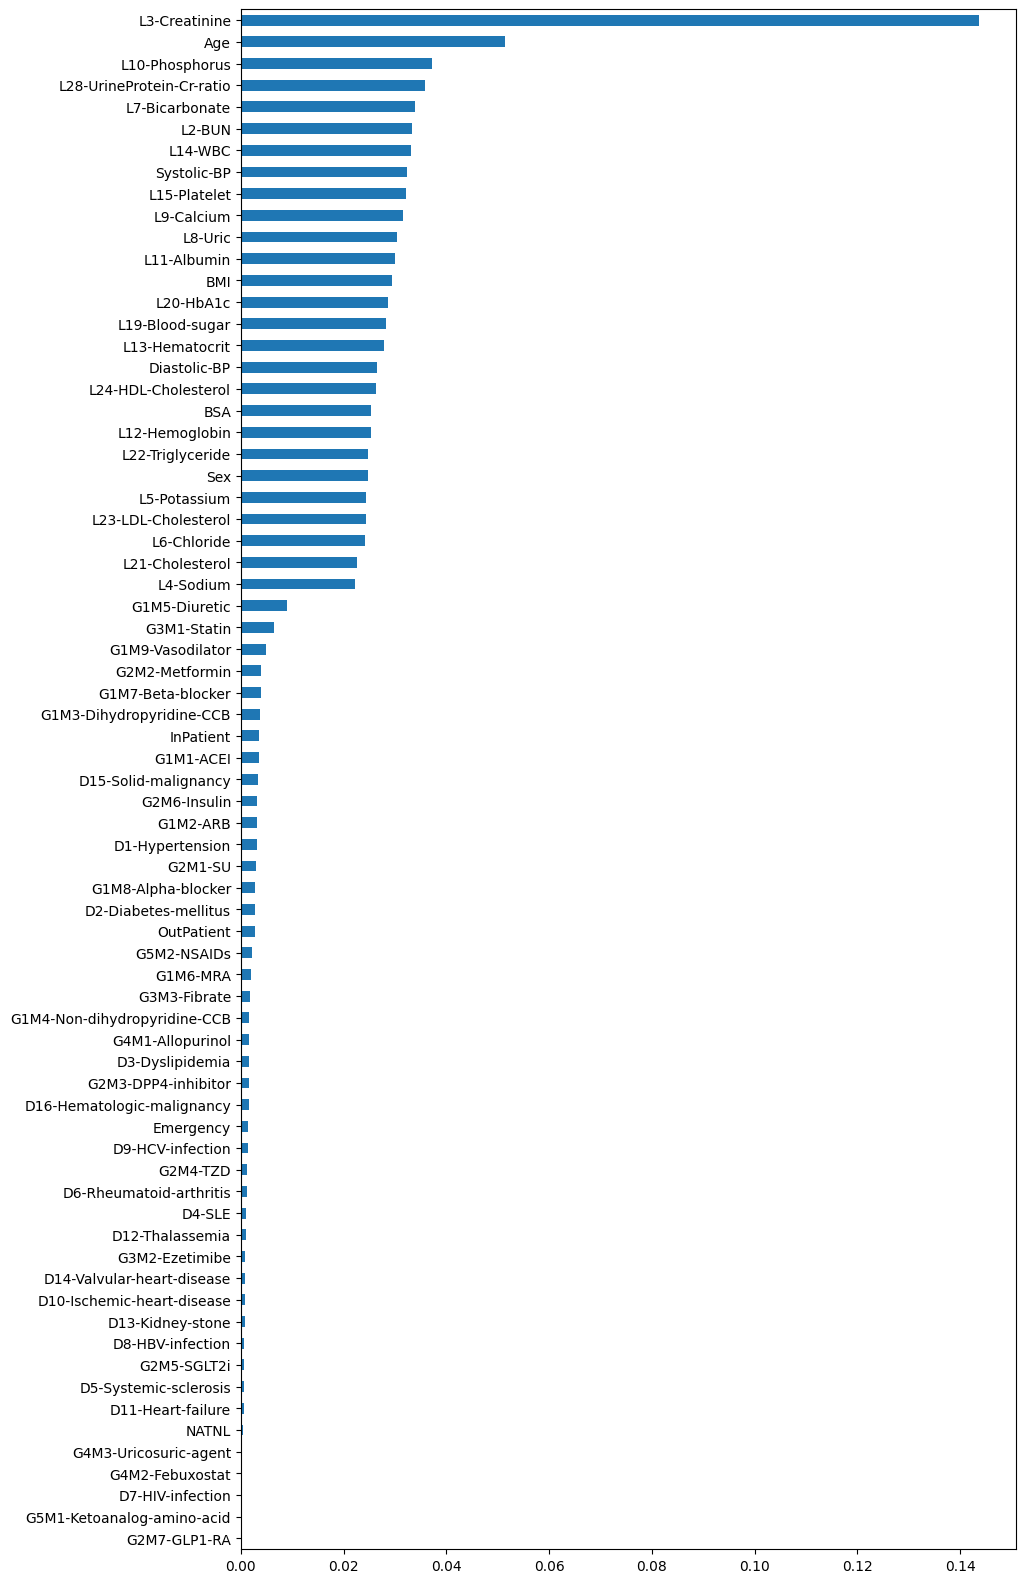

In [18]:
import matplotlib.pyplot as plt
fs_slope.plot(kind='barh', figsize=(10, 20))
plt.show()

In [19]:
slope_ip = fs[fs > .02].index#เรียงความสำคัญจากน้อยไปมาก #มี 27 คอลัมน์ที่สำคัญ
slope_ip

Index(['L4-Sodium', 'L21-Cholesterol', 'L6-Chloride', 'L23-LDL-Cholesterol',
       'L5-Potassium', 'Sex', 'L22-Triglyceride', 'L12-Hemoglobin', 'BSA',
       'L24-HDL-Cholesterol', 'Diastolic-BP', 'L13-Hematocrit',
       'L19-Blood-sugar', 'L20-HbA1c', 'BMI', 'L11-Albumin', 'L8-Uric',
       'L9-Calcium', 'L15-Platelet', 'Systolic-BP', 'L14-WBC', 'L2-BUN',
       'L7-Bicarbonate', 'L28-UrineProtein-Cr-ratio', 'L10-Phosphorus', 'Age',
       'L3-Creatinine'],
      dtype='object')

## eGFR

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, random_state=7)
x=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['L1-eGFR']
model.fit(x,y)

RandomForestRegressor(n_estimators=250, random_state=7)

In [21]:
model.feature_importances_

array([1.03904188e-05, 9.60191269e-06, 4.50122529e-06, 8.88905293e-02,
       7.64593909e-02, 4.82918077e-06, 1.89425461e-05, 3.45354910e-05,
       8.95760324e-06, 1.17015203e-05, 1.53379154e-05, 6.97168775e-06,
       2.51597534e-06, 2.00025691e-05, 1.66627638e-05, 4.28979934e-06,
       1.62800797e-05, 1.14049155e-06, 4.21132377e-07, 8.43530746e-06,
       1.03738839e-05, 7.15471820e-06, 1.77760051e-05, 3.18625154e-06,
       4.97055339e-08, 1.45921134e-06, 3.24788371e-06, 9.86169179e-08,
       0.00000000e+00, 6.06968196e-07, 1.22090635e-04, 1.31344431e-04,
       1.23104857e-04, 2.16320151e-04, 1.55448508e-05, 1.26440379e-05,
       1.05745443e-05, 6.06195696e-06, 7.58594789e-07, 2.44393852e-06,
       1.26002547e-06, 2.02334755e-06, 1.67208911e-06, 1.63530279e-06,
       9.57074383e-07, 2.03305889e-07, 2.37167014e-06, 1.55103616e-06,
       4.58392689e-06, 3.21746778e-06, 1.36060090e-04, 8.31302270e-01,
       1.03265176e-04, 1.06696340e-04, 1.03603247e-04, 1.36544254e-04,
      

In [22]:
fs_egfr=pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=True)
fs_egfr

G2M7-GLP1-RA                  0.000000e+00
G4M2-Febuxostat               4.970553e-08
G5M1-Ketoanalog-amino-acid    9.861692e-08
D12-Thalassemia               2.033059e-07
G2M5-SGLT2i                   4.211324e-07
                                  ...     
L24-HDL-Cholesterol           1.544818e-04
Systolic-BP                   2.163202e-04
Age                           7.645939e-02
Sex                           8.889053e-02
L3-Creatinine                 8.313023e-01
Length: 71, dtype: float64

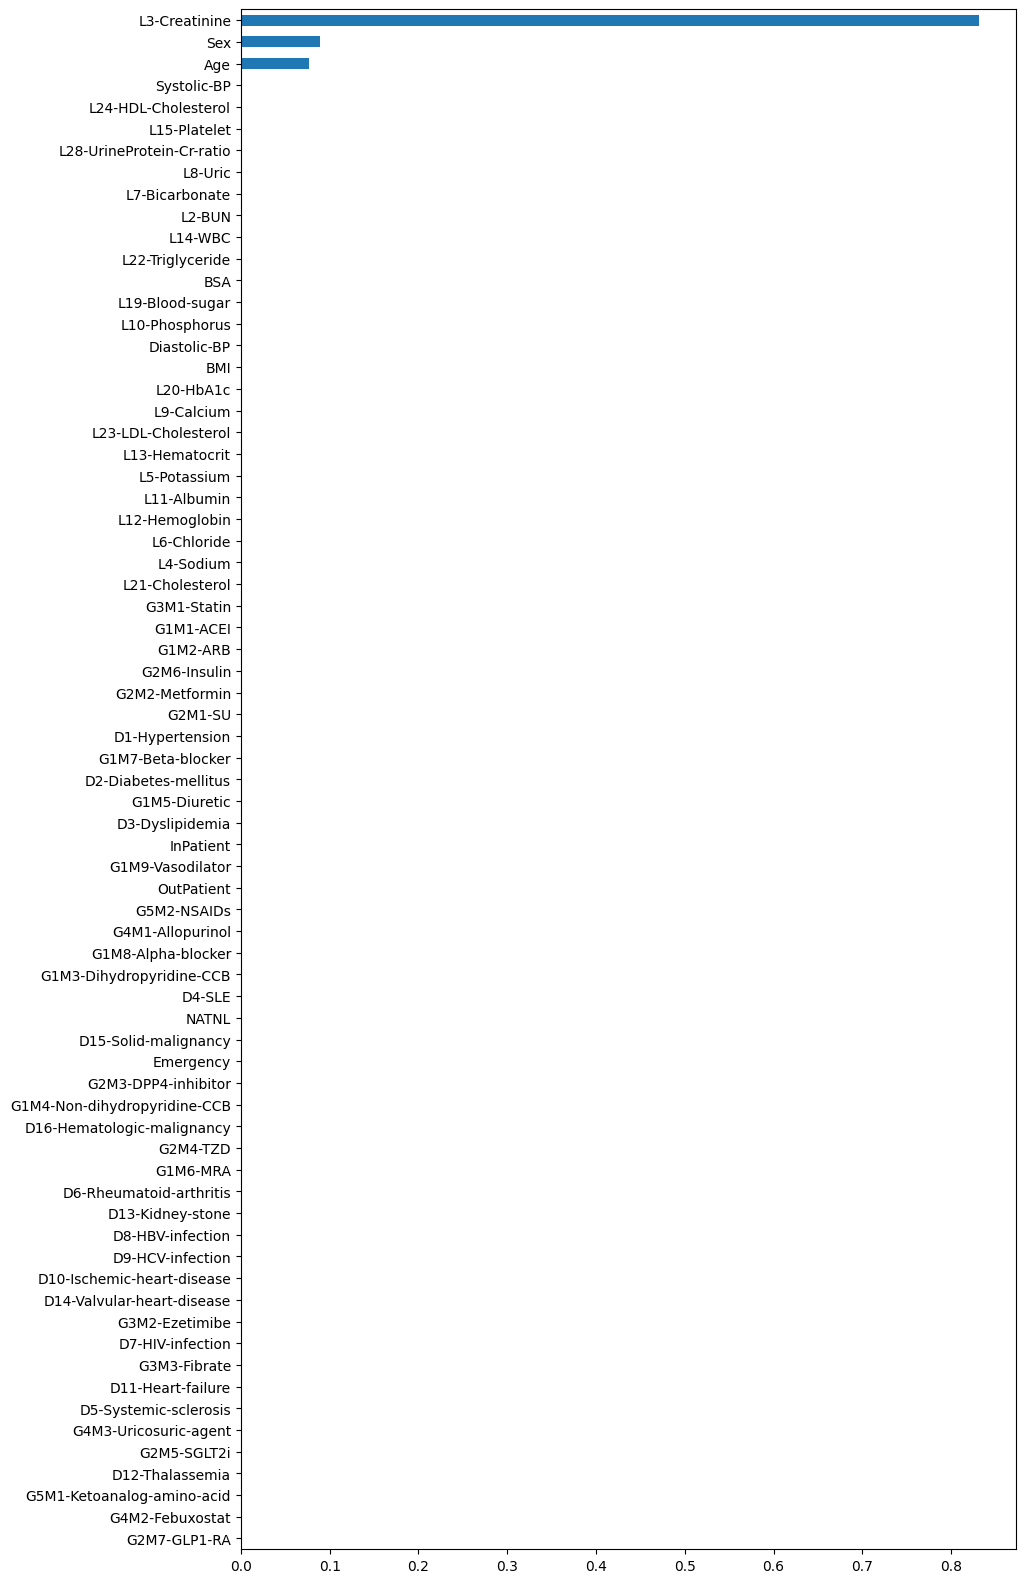

In [23]:
fs_egfr.plot(kind='barh', figsize=(10, 20))
plt.show()

In [25]:
egfr_ip = fs_egfr[fs_egfr > .01].index#เรียงความสำคัญจากน้อยไปมาก #มี 3 คอลัมน์ที่สำคัญ
egfr_ip

Index(['Age', 'Sex', 'L3-Creatinine'], dtype='object')

#PCA

จากการทำ Feature Importance พบว่า มีทั้งหมด 27 คอลัมน์ ที่สำคัญต่อ eGFR และ Slope โดยมีคอลัมน์ดังต่อไปนี้ (เรียงตามความสำคัญจากน้อยไปมาก)
1. 'L4-Sodium'
2. 'L21-Cholesterol'
3. 'L6-Chloride'
4. 'L23-LDL-Cholesterol',
5. 'L5-Potassium'
6.  'Sex'
7. 'L22-Triglyceride'
8. 'L12-Hemoglobin'
9.  'BSA',
10. 'L24-HDL-Cholesterol'
11. 'Diastolic-BP'
12. 'L13-Hematocrit'
13. 'L19-Blood-sugar'
14. 'L20-HbA1c'
15. 'BMI'
16. 'L11-Albumin'
17. 'L8-Uric'
18.  'L9-Calcium'
19. 'L15-Platelet'
20. 'Systolic-BP'
21. 'L14-WBC'
22.  'L2-BUN',
23. 'L7-Bicarbonate'
24. 'L28-UrineProtein-Cr-ratio'
25.  'L10-Phosphorus'
26. 'Age'
27. 'L3-Creatinine'